In [2]:
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import pylab
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
import networkx as nx
import copy

In [3]:
# GLOBAL PLOT PARAMETERS
plot_params = {'legend.fontsize': 'x-large',
               'axes.labelsize': 'large',
               'axes.titlesize':'20',
               'axes.labelsize':'33',
               'xtick.labelsize':'25',
               'font.family': 'Arial',
               'xtick.color':'dimgrey',
               'ytick.color':'dimgrey',
               'ytick.labelsize':'25'}
pylab.rcParams.update(plot_params)

In [4]:
data = open('../data/exp_1_one_player_known_structure/main/cond_1_BC.json')
data = json.load(data)

data_minimal_independent = {}
data_minimal_lr = {}

for room in data:   
    # now data are ordered lists with subject order A (subject1), B (subject2), and C (subject3)
    # list indexes below just placeholders to remind us of subject order and fish time 
    subjects = [0, 1, 2]
    sim_resp = [0, 1, 2]
    fish = [0, 1, 2]
    fish_time = [1, 3, 6]
    subject_ids = [0, 1, 2]
    subject_PID = [0, 1, 2]
    structures = [0, 1, 2]
    true_structures = [0]
    training = [0, 1, 2]
    socialTraining = [0, 1, 2]
    socialTrainingStructure = [0, 1, 2]
    trust = [0, 1, 2]
    age = [0, 1, 2]
    gender = [0, 1, 2]
    for subj in data[room]:
        
        if isinstance(data[room][subj]['info'],dict):
            if data[room][subj]['info']['number'] == 'subject1':
                fish[0] = data[room][subj]['info']['fish']
                subject_ids[0] = subj
                subject_PID[0] = data[room][subj]['info']['pid']
                training[0] = data[room][subj]['info']['training']
                socialTraining[0] = data[room][subj]['info']['socialTraining']
                socialTrainingStructure[0] = data[room][subj]['info']['socialTrainingStructure']
                trust[0] = data[room][subj]['info']['trust']
                age[0] = data[room][subj]['info']['age']
                gender[0] = data[room][subj]['info']['gender']
                sim_resp[0] = data[room][subj]['sim_resp']
                subjects[0] = data[room][subj]['planet_selections']
                structures[0] = data[room][subj]['info']['selected_structure']
                true_structures[0] = data[room][subj]['info']['condition']
            elif data[room][subj]['info']['number'] == 'subject2':
                subject_ids[1] = subj
                subject_PID[1] = data[room][subj]['info']['pid']
                training[1] = data[room][subj]['info']['training']
                trust[1] = data[room][subj]['info']['trust']
                age[1] = data[room][subj]['info']['age']
                gender[1] = data[room][subj]['info']['gender']
                socialTraining[1] = data[room][subj]['info']['socialTraining']
                socialTrainingStructure[1] = data[room][subj]['info']['socialTrainingStructure']
                sim_resp[1] = data[room][subj]['sim_resp']
                subjects[1] = data[room][subj]['planet_selections']
                structures[1] = data[room][subj]['info']['selected_structure']
                fish[1] = data[room][subj]['info']['fish']
            elif data[room][subj]['info']['number'] == 'subject3':
                subject_ids[2] = subj
                training[2] = data[room][subj]['info']['training']
                socialTraining[2] = data[room][subj]['info']['socialTraining']
                socialTrainingStructure[2] = data[room][subj]['info']['socialTrainingStructure']
                subject_PID[2] = data[room][subj]['info']['pid']
                trust[2] = data[room][subj]['info']['trust']
                age[2] = data[room][subj]['info']['age']
                gender[2] = data[room][subj]['info']['gender']
                sim_resp[2] = data[room][subj]['sim_resp']
                subjects[2] = data[room][subj]['planet_selections']
                structures[2] = data[room][subj]['info']['selected_structure']
                fish[2] = data[room][subj]['info']['fish']

        if true_structures[0] == 'independent':
            print('hi')
            data_minimal_independent[room] = {}
            data_minimal_independent[room]['structure'] = {}
            data_minimal_independent[room]['trust'] = {}
            data_minimal_independent[room]['age'] = {}
            data_minimal_independent[room]['gender'] = {}
            data_minimal_independent[room]['training'] = {}
            data_minimal_independent[room]['socialTraining'] = {}
            data_minimal_independent[room]['socialTrainingStructure'] = {}
            data_minimal_independent[room]['planet'] = {}
            data_minimal_independent[room]['sim_resp'] = {}
            data_minimal_independent[room]['subj_ids'] = {}
            data_minimal_independent[room]['subj_PID'] = {}
            data_minimal_independent[room]['fish'] = {}
            data_minimal_independent[room]['fish_time'] = {}
            data_minimal_independent[room]['fish_time'] = fish_time
            data_minimal_independent[room]['fish'] = fish
            data_minimal_independent[room]['trust'] = trust
            data_minimal_independent[room]['age'] = age
            data_minimal_independent[room]['gender'] = gender
            data_minimal_independent[room]['training'] = training
            data_minimal_independent[room]['socialTraining'] = socialTraining
            data_minimal_independent[room]['socialTrainingStructure'] = socialTrainingStructure
            data_minimal_independent[room]['structure'] = structures
            data_minimal_independent[room]['subj_ids'] = subject_ids
            data_minimal_independent[room]['subj_PID'] = subject_PID
            data_minimal_independent[room]['planet'] = subjects
            data_minimal_independent[room]['sim_resp'] = sim_resp
        elif true_structures[0] == 'lr':
            data_minimal_lr[room] = {}
            data_minimal_lr[room]['structure'] = {}
            data_minimal_lr[room]['planet'] = {}
            data_minimal_lr[room]['trust'] = {}
            data_minimal_lr[room]['age'] = {}
            data_minimal_lr[room]['gender'] = {}
            data_minimal_lr[room]['subj_ids'] = {}
            data_minimal_lr[room]['training'] = {}
            data_minimal_lr[room]['socialTraining'] = {}
            data_minimal_lr[room]['socialTrainingStructure'] = {}
            data_minimal_lr[room]['subj_PID'] = {}
            data_minimal_lr[room]['sim_resp'] = {}
            data_minimal_lr[room]['fish'] = {}
            data_minimal_lr[room]['fish_time'] = {}
            data_minimal_lr[room]['fish_time'] = fish_time
            data_minimal_lr[room]['fish'] = fish
            data_minimal_lr[room]['trust'] = trust
            data_minimal_lr[room]['age'] = age
            data_minimal_lr[room]['gender'] = gender
            data_minimal_lr[room]['subj_ids'] = subject_ids
            data_minimal_lr[room]['subj_PID'] = subject_PID
            data_minimal_lr[room]['planet'] = subjects
            data_minimal_lr[room]['training'] = training
            data_minimal_lr[room]['socialTraining'] = socialTraining
            data_minimal_lr[room]['socialTrainingStructure'] = socialTrainingStructure
            data_minimal_lr[room]['structure'] = structures
            data_minimal_lr[room]['sim_resp'] = sim_resp
data = {'independent': data_minimal_independent, 'b->c': data_minimal_lr}

In [5]:
# QUICK DEMOGRAPHICS

ages = []
genders = []
for room in list(data['b->c'].keys()):
  
    for age, gender in zip(data['b->c'][room]['age'], data['b->c'][room]['gender']):
        ages.append(int(age))
        genders.append(gender)
        break
print(np.mean(ages))
print(np.std(ages))
print(genders.count('female'))
# print(len(age_indep))
# print(np.std(age_indep))
# print(gender_indep.count('female'))
# print(len(age_indep))
# print(gender_indep)

# 38.0 33.8
# 16.28862022812768
# 84
print(len(ages))
print(ages)
print(len(data_minimal_lr))

38.0
16.28862022812768
28
47
[47, 1, 24, 25, 1, 29, 74, 31, 38, 28, 38, 31, 20, 62, 33, 18, 31, 30, 24, 35, 23, 34, 21, 44, 23, 59, 27, 56, 28, 53, 38, 38, 40, 66, 33, 52, 31, 46, 58, 54, 46, 71, 65, 33, 57, 36, 34]
47


In [6]:
# COMPUTE PERFORMANCE BONUS
def compute_prolific_bonus(data):
    pids = []
    boni = []
    for condition in list(data.keys()):
        for room in data[condition]:
            subj_count = 0
            for selections in data[condition][room]['planet'][:1]:
                bonus = 0
                if subj_count != 1:
                    for selection in selections:
                        if selection < 0:
                            bonus += 0.15
                else: 
                    for selection in selections:
                        if selection < 0:
                            bonus += 0.15
                boni.append(bonus)
            pids.append(data[condition][room]['subj_PID'][0])
    return pids, boni
pids, boni = compute_prolific_bonus(data)[0], compute_prolific_bonus(data)[1] 
for pid, bonus in zip(pids, boni):
    bonus = np.round(bonus,2)
    if bonus > 0:
        print(pid,",",bonus)

5e184bc02c53521176be15e2 , 0.75
5a538587ac5624000153728a , 0.3
615c890377d5d24fe1d375a6 , 0.15
5fa3f95e37e424055200c834 , 0.75
6164644cda075b1b7e711b88 , 0.45
5d339a0d3914420001a07f00 , 1.05
604b8cdd051e45163a8e7ecb , 0.75
5cfd0b3f0526d1000184ad8f , 0.15
5deed93eb235fc5888f1fcd5 , 0.3
5ea17eab782cfc02a028ae76 , 0.3
5b9d90c56b0f63000148e13f , 0.9
5f31233084da6004d4e59bc0 , 0.45
60dfa05ef650f85aa9291418 , 0.3
5ed12a5eec9433042524d6ee , 0.45
5c44dcb46b27970001e395ef , 0.3
5f31a239e7ed2f09f2b4a4ef , 0.3
5f05b6a83c0c4206b334458a , 0.45
6102c8df44596782a4b121df , 0.15
611bf8e9958eea5e1396de10 , 0.9
600fbd5faa45791bc99e1597 , 0.75
5c3723564f2e52000177698d , 0.6
5f1d5591fe7ca36560aa455a , 0.15
60509a0a3b167b0b85516e9a , 0.45
58d0632c2fc72000011f8c57 , 0.75
5ea3319a6a1a5b2a1175ed6e , 0.75
5780d9a1900cc80001d2d1c2 , 0.9
5c61b5da31489a0001fa81c5 , 0.3


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[

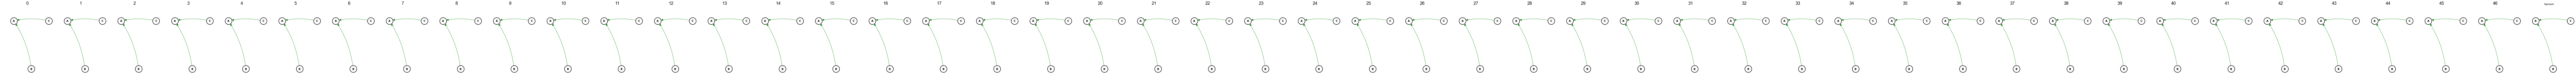

In [7]:
# PLOTTING STRUCTURE FROM ADJACENCY MATRIX 
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def show_structure(data, condition, truth = True, subject='subject1', subjnumber=0):
    structure_matrices = [] 
    rooms = []
    ids = []
    truth = []
    for room in data:
        if condition == 'b->c':
            print('meow')
            truth.append(np.array([[0, 0.01, 0.5], [0.4, 0, 1], [1, 0, 0]])) # 0.01 just to make sure plots drawn properly
        elif condition == 'independent':
            truth.append(np.array([[0, 0.01, 0], [1, 0, 0], [1, 0, 0]]))
        structure_matrices.append(np.array(data[room]['structure'][subjnumber]))
        rooms.append(room)
        ids.append(data[room]['subj_ids'][subjnumber])
    # average across subjs
    ids.append('Aggregate')
    average_matrix = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
    for matrix in structure_matrices:
        # print(matrix)
        average_matrix = average_matrix + matrix
    average_matrix = average_matrix / (len(rooms)-1)
    print(average_matrix)
    # print('hi')
        
    if condition == 'b->c':
        truth.append(np.array([[0, 0.01, 0.5], [0.4, 0, 1], [1, 0, 0]])) # 0.01 just to make sure plots drawn properly
    elif condition == 'independent':
        truth.append(np.array([[0, 0.01, 0], [1, 0, 0], [1, 0, 0]]))
    
    structure_judgments = open('processed_data_and_figures/exp_1_one_player_known_structure/main_1/cond_1_BC_full.txt', "w")
    room_count = 0
    for row in structure_matrices:
        room_count += 1
        print(row)
        np.savetxt(structure_judgments, row)
    structure_judgments.close()
    structure_matrices.append(average_matrix)
    fig, axs = plt.subplots(1, len(rooms)+1, figsize=(165,5)) 
    for room in range(len(rooms) + 1):    
        adjacency_matrix = structure_matrices[room]
        adjacency_matrix[adjacency_matrix == 0] = 0.01 # just to make sure all edges are drawn and graphs have same dimensions
       # uncomment this if we want to plot the ground truth 
#         if truth:
#             if condition == 'b->c':
#                 adjacency_matrix =  np.array([[0, 0.001, 0.001], [1, 0, 1], [1, 0.001, 0]]) # 0.001 just to make sure plots drawn properly
#             elif condition == 'independent':
#                 adjacency_matrix =  np.array([[0, 0.001, 0.001], [1, 0, 0.001], [1, 0.001, 0]])
        pos = {1: (1, 0.9), 0: (0.9, 1), 2: (1.1, 1)} 
        # draw DAG graph from adjacency matrix 
        gr = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.DiGraph)
        weights = nx.get_edge_attributes(gr, "weight")
        # adding nodes 
        all_rows = range(0, adjacency_matrix.shape[0])
        for n in all_rows:
            gr.add_node(n)
        # getting edges 
        edges = gr.edges()
        # weight and color of edges 
        alphas = [weights[edge] * 2 for edge in edges]
#         colors = [rgb_to_hex(tuple(np.repeat(int(255 * (1-weights[edge])),3))) for edge in edges]
        colors = [tuple(np.repeat(1-weights[edge],3)) + (weights[edge],) for edge in edges]
#          comment below if we are plotting ground truth
        if subject == 'subject1':
            colors[3] = (0,128/255,0,1.0)
            colors[6] = (0,128/255,0,1.0)
        elif subject == 'subject3' and condition == 'b->c':
            colors[5] = (0,128/255,0,1.0)
        # draw graph 
        print(gr)
        nx.draw(gr, 
                pos, 
                ax=axs[room],
                edgecolors='black', 
                node_color='white', 
                arrowsize=20,
                # arrowstyle='simple',
                node_size=1000, 
                labels={0: "A", 1: "B", 2: "C"},
                font_weight='bold',
                linewidths=2,
                with_labels=True,
#                 orientation=u'vertical', 
                connectionstyle="arc3,rad=0.12",
              
                edge_color=colors)
#                 width=alphas)
        # set title 
        if room <= len(rooms) - 1:
            axs[room].set_title(str(room))
        elif room == len(rooms):
            axs[room].set_title(str(ids[room]), size=10,  y=1)
    plt.tight_layout()
    # plt.savefig('processed_data_and_figures/exp_1_one_player_known_structure/main_1/cond_2_struct_judgs.pdf') 
show_structure(data_minimal_lr, 'independent', truth=False, subject='subject1', subjnumber=0)

In [8]:
# plotting model likelihoods for bivariate structure 
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
def show_bivariate_ll(model_ll, condition=None):
    structure_matrices = []
    for room in model_ll:
        ll_array = np.fromiter(room.values(), dtype=float)
        ll_array = np.reshape(ll_array, (-1, 2))
        ll_array[0,1] = ll_array[0,1] + ll_array[1,1]
        ll_array[1,0] = ll_array[1,0] + ll_array[1,1]
        np.fill_diagonal(ll_array, 0)
        structure_matrices.append(ll_array)
    fig, axs = plt.subplots(1, len(model_ll) + 1, figsize=(19,2.5))
    average_matrix = np.array([[0, 0], [0, 0]])
    for matrix in structure_matrices:
        average_matrix = average_matrix + matrix
    average_matrix = average_matrix / len(model_ll)
    structure_matrices.append(average_matrix)
    for room in range(len(model_ll) + 1):   
        adjacency_matrix = structure_matrices[room]
        adjacency_matrix[adjacency_matrix == 0] = 0.001 # just to make sure all edges are drawn and graphs have same dimensions
        pos = {0: (0.9, 1), 1: (.95, 1)} 
        # draw DAG graph from adjacency matrix 
        gr = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.DiGraph)
        weights = nx.get_edge_attributes(gr, "weight")
        # adding nodes 
        all_rows = range(0, adjacency_matrix.shape[0])
        for n in all_rows:
            gr.add_node(n)
        # getting edges 
        edges = gr.edges()
        # weight and color of edges 
        alphas = [weights[edge] * 2 for edge in edges]
        colors = [tuple(np.repeat(1-weights[edge],3)) + (weights[edge],) for edge in edges]
        # draw graph 
        nx.draw(gr, 
                pos, 
                ax=axs[room],
                edgecolors='black', 
                node_color='white', 
                arrowsize=20,
                arrowstyle='simple',
                node_size=2000, 
                labels={0: "B", 1: "C"},
                font_weight='bold',
                linewidths=2,
                with_labels=True,
                connectionstyle="arc3,rad=0.12",
                edge_color=colors)
#                 width=alphas)
#         # set title 
#         if room <= len(rooms) - 1:
#             axs[room].set_title('agentA_id: ' + str(ids[room]), size=10,  y=1)
#         elif room == len(rooms):
#             axs[room].set_title(str(ids[room]), size=10,  y=1)
        if room <= len(model_ll) - 1:
            axs[room].set_title('Cat_Change', size=10)
        elif room == len(model_ll):
            axs[room].set_title('Aggregate', size=10,  y=1)
    plt.tight_layout()
#     plt.savefig('figures/pilot_1_06_01_2021/' + condition + '/structure_ll_cat_change.pdf') 
#                 
show_bivariate_ll(ll, condition='indepenwdent')

NameError: name 'll' is not defined

/var/folders/00/9xpq5wf91c52hxnyh5ythpw40000gn/T/ipykernel_33813/3918287008.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[room].set_xticklabels(['']+names,size=15,color='black')
/var/folders/00/9xpq5wf91c52hxnyh5ythpw40000gn/T/ipykernel_33813/3918287008.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[room].set_yticklabels(trials,size=15,color='black')


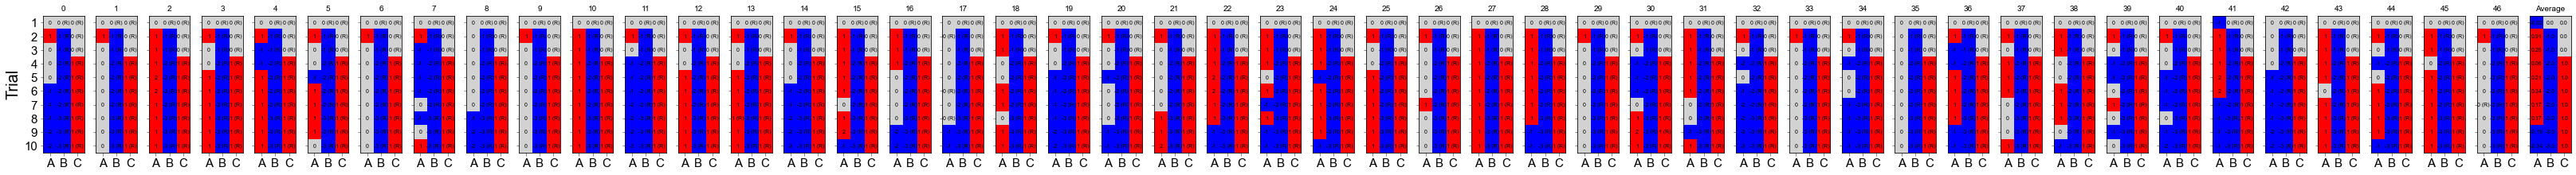

In [9]:
# PLOTTING SEQUENCES 
average_responses = None 
idscheck = ['none']
def show_sequences(data, condition):
    matrices = [] 
    rooms = []
    ids = []
    sim = []
    a=0
    for room in data:
        a += 1
        matrix = np.array(data[room]['planet'])
        matrix = [np.array(i[:10]) for i in matrix]
        matrices.append(matrix)
        rooms.append(room)
        sim.append(np.array([np.array(i[:10]).astype(int) for i in data[room]['sim_resp']]))
        ids.append(data[room]['subj_PID'][0]) 
    fig, axs = plt.subplots(1, len(rooms) + 1, figsize=(45,20),sharey=True) 
    average_matrix = np.zeros((3,10))
    for matrix in matrices:
        matrix = np.array([i[:10] for i in matrix])
        average_matrix = average_matrix + matrix
    average_matrix = average_matrix / len(rooms) 
    average_responses = average_matrix
    matrices.append(average_matrix)
    sim.append(average_matrix)
    # transforming matrices 
    for room in range(len(rooms) + 1):
        matrix = np.array([i[:10] for i in matrices[room]]).transpose()
        label_matrix = copy.deepcopy(matrix)
        sim_matrix = np.array(sim[room].transpose())
        color_matrix = copy.deepcopy(label_matrix)
        color_matrix[color_matrix<0] = -1
        color_matrix[color_matrix>0] = 1
        axs[room].matshow(color_matrix, cmap=LinearSegmentedColormap.from_list('rg',["blue","lightgrey", "red"], N=256))
        if -1 not in color_matrix:
            axs[room].matshow(color_matrix, cmap=LinearSegmentedColormap.from_list('rg',["lightgrey", "red"], N=256))
        # specifics 
        names = ['A', 'B', 'C']
        trials = ['1','2','3','4','5','6','7','8','9','10']
        axs[room].set_xticklabels(['']+names,size=15,color='black')
        if room <= len(rooms) -1:
            if ids[room] in idscheck:     
                axs[room].set_title('DUPLICATE', size=10)
                print(rooms[room])
            axs[room].set_title('' + str(room), size=10)
            idscheck.append(ids[room])
        if room == len(rooms):
            axs[room].set_title('Average', size=10)
#             axs[room].annotate(r'$e_{t_{1}}=$red fish', xy=(-0.4, 0.8),  xycoords='data',
#                     xytext=(-0.3, 0.94), textcoords='axes fraction',
#                     arrowprops=dict(facecolor='black', shrink=0.05),
#                     horizontalalignment='right', verticalalignment='top',
#                     )
#             axs[room].annotate(r'$e_{t_{3}}=$blue fish', xy=(0.7, 3.2),  xycoords='data',
#                     xytext=(-0.3, 0.58), textcoords='axes fraction',
#                     arrowprops=dict(facecolor='black', shrink=0.05),
#                     horizontalalignment='right', verticalalignment='top',
#                     )
#             axs[room].annotate(r'$e_{t_{6}}=$red fish', xy=(1.7, 6.3),  xycoords='data',
#                     xytext=(-0.3, 0.27), textcoords='axes fraction',
#                     arrowprops=dict(facecolor='black', shrink=0.05),
#                     horizontalalignment='right', verticalalignment='top',
#                     )
        if room == 0:
            axs[room].set_ylabel('Trial', size=20)
        axs[room].set_yticklabels(trials,size=15,color='black')
        axs[room].xaxis.set_ticks_position('bottom')
        axs[room].set_yticks([0,1,2,3,4,5,6,7,8,9]) 
        for i in range(label_matrix.shape[1]):
            for j in range(label_matrix.shape[0]):
                c = str(np.round(label_matrix[j,i],2)) 
                if sim_matrix[j,i] == 1 and room != len(rooms):                 
                    c = str(c) + " (R)"
                axs[room].text(i, j, str(c), va='center', ha='center', size=7)
    plt.tight_layout()
    # plt.savefig('processed_data_and_figures/exp_1_one_player_known_structure/main_1/cond_3_CB_full.pdf') 
    return average_matrix, matrices

average_responses = show_sequences(data_minimal_lr, 'b->c')


In [10]:
# WRITE Matrix to text file 
judgments = open('processed_data_and_figures/exp_1_one_player_known_structure/main_1/cond_1_BC_full.txt', "w")
row_count = 0
# print(average_responses)
for row in range(len(average_responses[1])):
    row_count += 1
    np.savetxt(judgments, average_responses[1][row])
judgments.close()

In [23]:
print(average_responses[1][0])

[array([ 0,  1,  0,  0,  0, -1, -1, -1, -2, -2]), array([ 0, -1, -1, -2, -2, -2, -2, -3, -3, -3]), array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])]


In [26]:
# PLOTTING TRAINING SEQUENCES 
def show_sequences(data, condition):
    matrices = [] 
    rooms = []
    ids = []
    sim = []
    for room in data:
       
        full_training = np.append(np.array(data[room]['training']), np.array(data[room]['socialTraining']), axis=1)
        full_training = np.append(full_training, np.array([[int(i)] for i in data[room]['socialTrainingStructure']]), axis=1)
        addTraining = np.append(full_training, np.array([[int(i)] for i in data[room]['trust']]),  axis=1)
        matrices.append(addTraining)
        rooms.append(room)
        sim.append(np.array(data[room]['sim_resp']).astype(int))
        ids.append(data[room]['subj_ids'][0])
    fig, axs = plt.subplots(1, len(rooms) + 1-1, figsize=(22,4),sharey=True) 
    average_matrix = np.zeros((3,9))
    for matrix in matrices:
        average_matrix = average_matrix + matrix
    average_matrix = average_matrix / len(rooms) 
    matrices.append(average_matrix)
    sim.append(average_matrix)
    # transforming matrices 
    for room in range(len(rooms)+1-1):
        label_matrix = np.array(matrices[room]).transpose()
        sim_matrix = np.array(sim[room].transpose())
        color_matrix = copy.deepcopy(label_matrix)
        color_matrix[color_matrix<0] = -1
        color_matrix[color_matrix>0] = 1
        color_matrix[8,0] = -2
        color_matrix[8,1] = -2
        color_matrix[8,2] = -2
        if 1 in color_matrix:
            axs[room].matshow(color_matrix, cmap=LinearSegmentedColormap.from_list('rg',["white","blue","lightgray","red"], N=256))
        else:
            axs[room].matshow(color_matrix, cmap=LinearSegmentedColormap.from_list('rg',["white","blue","lightgray"], N=256))
        # specifics 
        names = ['A', 'B', 'C']
        trials = ['X','B','B','X','R', '3R,0', '3R,2R', 'Revise', 'Trust']
        axs[room].set_xticklabels(['']+names,size=10,color='black')
        if room < len(rooms) -1:
            axs[room].set_title(str(room), size=10)
        elif room == len(rooms)-1:
            axs[room].set_title('Average', size=10)
#             axs[room].annotate(r'$e_{t_{1}}=$blue fish', xy=(-0.4, 0.8),  xycoords='data',
#                     xytext=(-0.3, 0.94), textcoords='axes fraction',
#                     arrowprops=dict(facecolor='black', shrink=0.05),
#                     horizontalalignment='right', verticalalignment='top',
#                     )
#             axs[room].annotate(r'$e_{t_{2}}=$blue fish', xy=(-0.4, 1.8),  xycoords='data',
#                     xytext=(-0.3, 0.75), textcoords='axes fraction',
#                     arrowprops=dict(facecolor='black', shrink=0.05),
#                     horizontalalignment='right', verticalalignment='top',
#                     )
#             axs[room].annotate(r'$e_{t_{4}}=$red fish', xy=(-.4, 3.9),  xycoords='data',
#                     xytext=(-0.3, 0.25), textcoords='axes fraction',
#                     arrowprops=dict(facecolor='black', shrink=0.05),
#                     horizontalalignment='right', verticalalignment='top',
#                     )
            
        axs[room].set_yticklabels(trials,size=10,color='black')
        axs[room].xaxis.set_ticks_position('bottom')
        axs[room].set_yticks([0,1,2,3,4,5,6,7,8])
        for i in range(label_matrix.shape[1]):
            for j in range(label_matrix.shape[0]):
                c = str(np.round(label_matrix[j,i],1)) 
                if label_matrix[j,i] == -100 or label_matrix[j,i] < -10:
                    c = "-"
                axs[room].text(i, j, str(c), va='center', ha='center')
    plt.tight_layout()
    # plt.savefig('processed_data_and_figures/NAME') 
# show_sequences(data_minimal_independent, 'independent')